<font color='green' size='6'>**Домашняя работа 2**</font>  
<font color='#11a642' size='5'>**Тема: Машинное обучение**</font>  
<font size='5'>**Задание:**</font>  

Домашняя работа основана на данных https://archive.ics.uci.edu/dataset/109/wine.


**Что нужно сделать:**

0. Загрузите данные https://archive.ics.uci.edu/dataset/109/wine, например вот так
```
from sklearn.datasets import load_wine  
data = load_wine()


1. Проведите разведочный анализ данных (EDA)

2. Если есть пропуски, заполнить пропуски

3. Уменьшить размерность с помощью PCA до 2 компонент

4. Оцените долю сохраненной дисперсии

5. Постройте scatterplot 1-ой и 2-ой главной компоненты, окрасить точки в зависиости от target (столбец class)







Форма данных: (178, 13)

Первые строки данных:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_

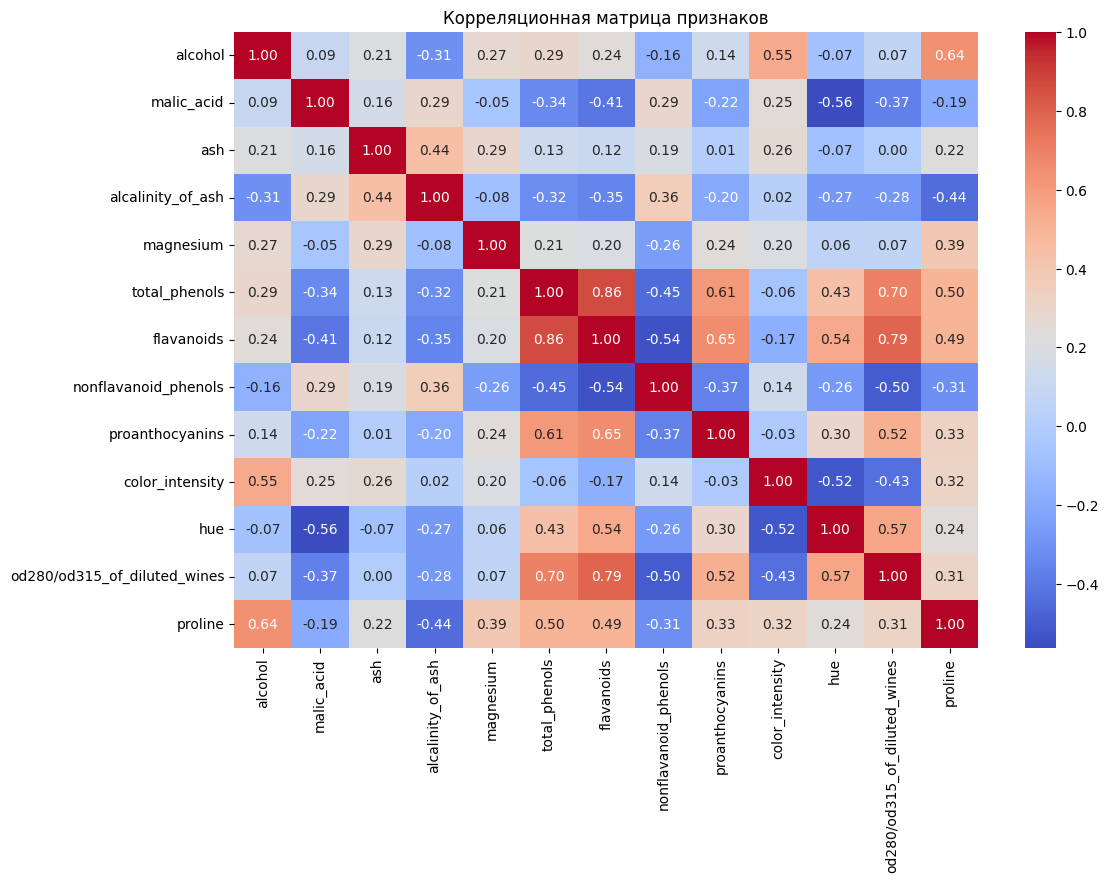


Пропущенные значения:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

Доля сохраненной дисперсии по компонентам: [0.36198848 0.1920749 ]
Суммарная сохраненная дисперсия: 0.5540633835693528


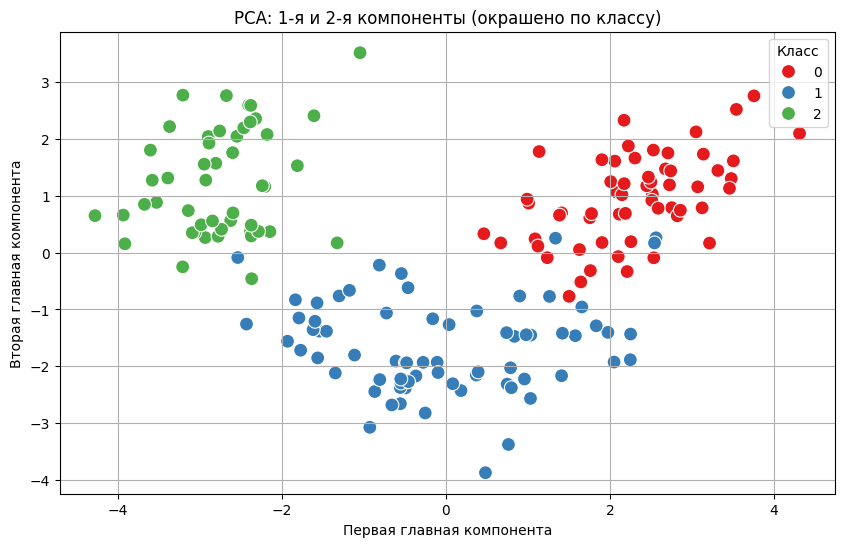

In [ ]:
# 0. Загрузка данных
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Загружаем данные
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='class')

# 1. Разведочный анализ данных (EDA)
print("Форма данных:", X.shape)
print("\nПервые строки данных:")
print(X.head())

print("\nРаспределение классов:")
print(y.value_counts())

print("\nСтатистика по признакам:")
print(X.describe())

# Проверка на корреляции
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица признаков")
plt.show()

# 2. Проверка и заполнение пропусков
print("\nПропущенные значения:")
print(X.isnull().sum())

# 3. PCA до 2 компонент
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Оценка доли сохраненной дисперсии
explained_variance = pca.explained_variance_ratio_
print("\nДоля сохраненной дисперсии по компонентам:", explained_variance)
print("Суммарная сохраненная дисперсия:", explained_variance.sum())

# 5. Scatterplot главных компонент
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1', s=100)
plt.title("PCA: 1-я и 2-я компоненты (окрашено по классу)")
plt.xlabel("Первая главная компонента")
plt.ylabel("Вторая главная компонента")
plt.legend(title='Класс')
plt.grid(True)
plt.show()